In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#matplotlib.rcParams["figure.figsize"] = (20, 10)

In [2]:
df = pd.read_csv("data/House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.area_type.value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [5]:
df.drop(["area_type", "availability", "society", "balcony"], axis=1, inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [6]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
df.shape

(13246, 5)

In [9]:
df["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df["bedroom"] = df["size"].apply(lambda x: int(x.split(" ")[0]))

In [11]:
df.bedroom.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
df[df.bedroom > 20]

,location,size,total_sqft,bath,price,bedroom
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [13]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [14]:
df[~df.total_sqft.apply(is_float)].head()

,location,size,total_sqft,bath,price,bedroom
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [16]:
data = df.copy()
data["total_sqft"] = data["total_sqft"].apply(convert_sqft_to_num)
data.head(3)

,location,size,total_sqft,bath,price,bedroom
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [17]:
data.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bedroom               4
Name: 30, dtype: object

In [18]:
data.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bedroom        0
dtype: int64

In [19]:
df = df.dropna()
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bedroom       0
dtype: int64

In [20]:
data2 = data.copy()
data2["price_per_sqft"] = (data2.price * 100000) / (data2.total_sqft)
data2.head(5)

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
len(data2.location.unique())

1304

In [22]:
data2.location = data2.location.apply(lambda x: x.strip())
location_stats =  data2.location.value_counts()
location_stats

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [23]:
len(location_stats[location_stats <= 10])

1052

In [24]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [25]:
len(data2.location.unique())

1293

In [26]:
data2.location = data2.location.apply(lambda x: "other" if x in location_stats_less_than_10 else x)
len(data2.location.unique())

242

In [27]:
data2[(data2.total_sqft / data2.bedroom) < 300].head()

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [28]:
data2.shape

(13246, 7)

In [29]:
data3 = data2[~((data2.total_sqft / data2.bedroom) < 300)]
data3.shape

(12502, 7)

In [30]:
data3.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [31]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (mean - std)) & (subdf.price_per_sqft <= (mean + std))]
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

data4 = remove_pps_outliers(data3)
data4.shape

(10241, 7)

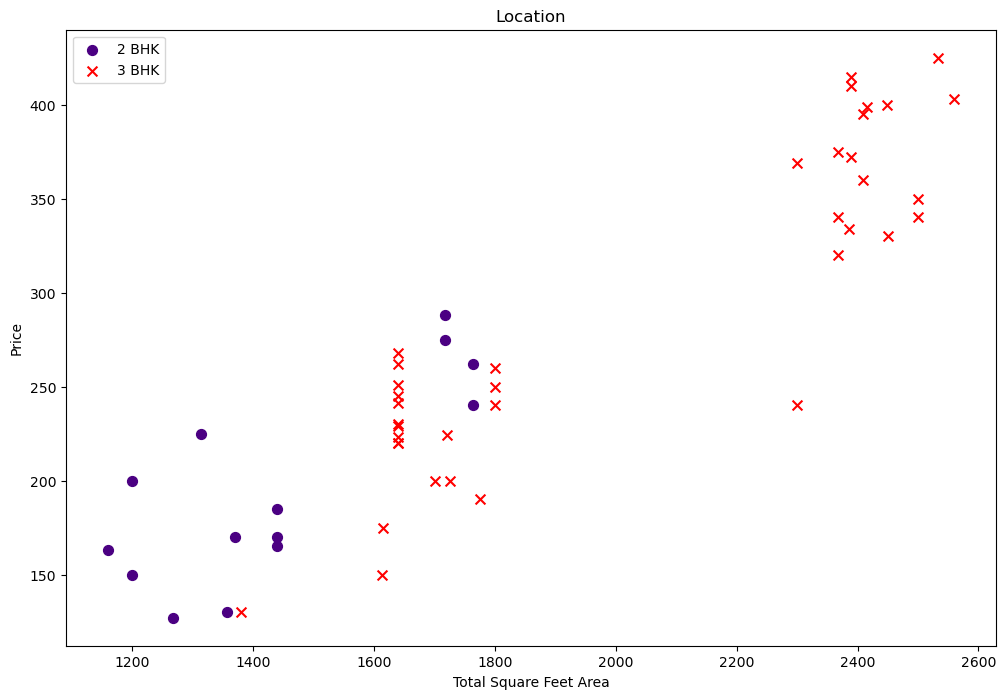

In [32]:
def plot_scatter_chart(df, location):
    bedroom2 = df[(df.location == location) & (df.bedroom == 2)]
    bedroom3 = df[(df.location == location) & (df.bedroom == 3)]

    plt.figure(figsize=(12, 8))
    plt.scatter(bedroom2.total_sqft, bedroom2.price, color="indigo", label="2 BHK", s=50)
    plt.scatter(bedroom3.total_sqft, bedroom3.price, marker="x", color="red", label="3 BHK", s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title("Location")
    plt.legend()

plot_scatter_chart(data4, "Rajaji Nagar")

In [33]:
data4[data4.location == "Rajaji Nagar"]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
5725,Rajaji Nagar,3 BHK,1640.0,3.0,229.0,3,13963.414634
5726,Rajaji Nagar,3 BHK,2390.0,3.0,415.0,3,17364.016736
5727,Rajaji Nagar,3 BHK,2390.0,3.0,410.0,3,17154.811715
5728,Rajaji Nagar,3 BHK,1725.0,3.0,200.0,3,11594.202899
5729,Rajaji Nagar,4 BHK,3516.0,4.0,540.0,4,15358.361775
...,...,...,...,...,...,...,...
5790,Rajaji Nagar,3 BHK,2367.0,3.0,320.0,3,13519.222645
5791,Rajaji Nagar,3 BHK,2409.0,3.0,395.0,3,16396.845164
5792,Rajaji Nagar,2 Bedroom,1314.0,2.0,225.0,2,17123.287671
5793,Rajaji Nagar,2 BHK,1440.0,2.0,165.0,2,11458.333333


In [34]:
def remove_bedroom_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bedroom_stats = {}
        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            bedroom_stats[bedroom] = {
                'mean': np.mean(bedroom_df.price_per_sqft),
                'std': np.std(bedroom_df.price_per_sqft),
                'count': bedroom_df.shape[0]
            }
        for bedroom, bedroom_df in location_df.groupby('bedroom'):
            stats = bedroom_stats.get(bedroom-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bedroom_df[bedroom_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [35]:
data5 = remove_bedroom_outliers(data4)
data5.shape

(7329, 7)

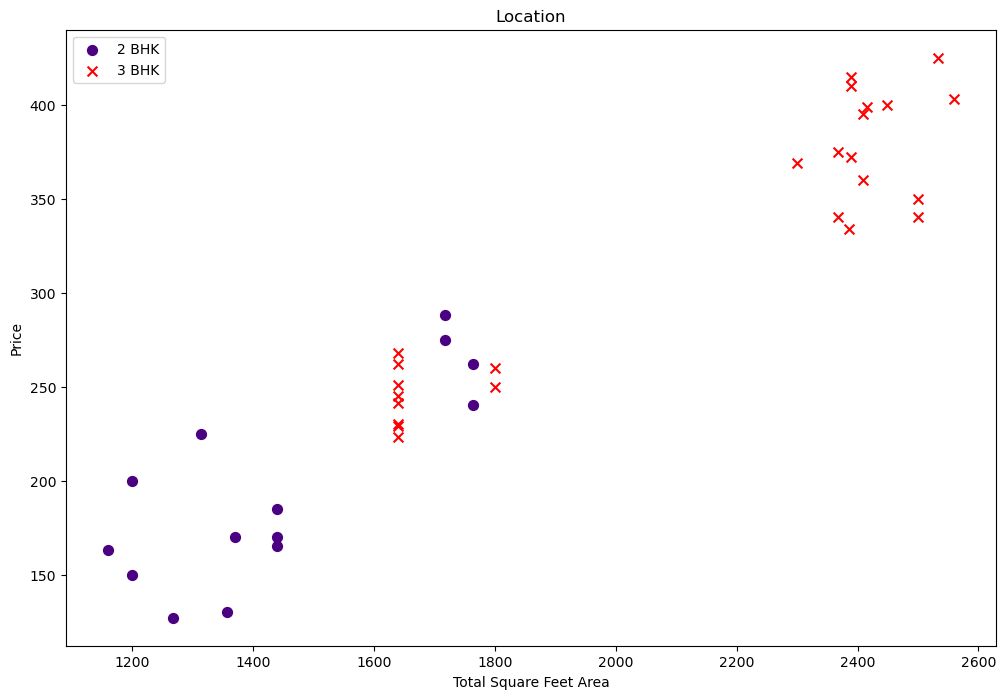

In [36]:
plot_scatter_chart(data5, "Rajaji Nagar")

Text(0, 0.5, 'Count')

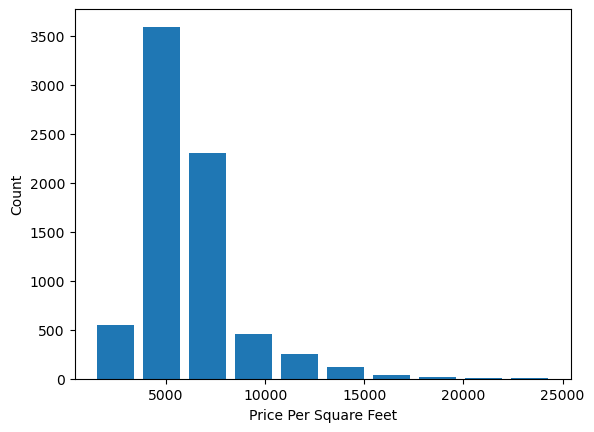

In [37]:
plt.hist(data5.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [38]:
data5.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

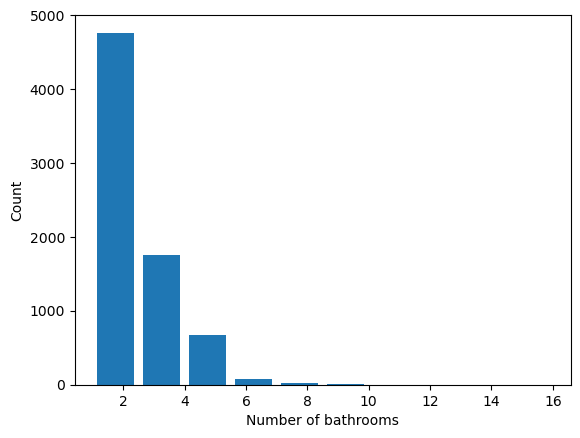

In [39]:
plt.hist(data5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [40]:
data5[data5.bath>10]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [41]:
data5[data5.bath > data5.bedroom+2]

,location,size,total_sqft,bath,price,bedroom,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [42]:
data6 =  data5[data5.bath < data5.bedroom+2]
data6.shape

(7251, 7)

## Building Model

In [43]:
dummies = pd.get_dummies(data6.location).drop("other", axis=1)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [44]:
data7 = pd.concat([data6.drop(["location", "size", "price_per_sqft"], axis=1), dummies],  axis=1)
data7.head()

,total_sqft,bath,price,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:
data7.shape

(7251, 245)

In [46]:
X = data7.drop("price", axis=1)
X.head()

,total_sqft,bath,bedroom,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
y = data7.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8452277697874319

In [50]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X_train, y_train, cv=cv)

array([0.83138119, 0.83224308, 0.87421572, 0.8837065 , 0.8080133 ])

In [51]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

def find_best_model(X, y):
    algos = {
        "linear_regression": {
            "model": LinearRegression(),
            "params": {
                "fit_intercept": [True, False]
            }
        },
        "lasso": {
            "model": Lasso(),
            "params": {
                "alpha": [1, 2],
                "selection": ["random", "cyclic"]
            }
        },
        "decision_tree": {
            "model": DecisionTreeRegressor(),
            "params": {
                "criterion": ["squared_error", "friedman_mse"],
                "splitter": ["best", "random"]
            }
        } 
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        grid = GridSearchCV(config["model"], config["params"], cv=cv, return_train_score=False)
        grid.fit(X, y)
        scores.append({
            "model": algo_name,
            "best_score": grid.best_score_,
            "best_params": grid.best_params_
        })

    return pd.DataFrame(scores, columns=["model", "best_score", "best_params"])

find_best_model(X_train, y_train)

,model,best_score,best_params
0,linear_regression,0.846190,{'fit_intercept': False}
1,lasso,0.697254,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.672527,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [52]:
def predict_price(location,sqft,bath,bedroom):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bedroom
    if loc_index >= 0:
        x[loc_index] = 1

    x_df = pd.DataFrame([x], columns=X.columns)
    return model.predict(x_df)[0]

In [53]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

83.49904677176052

In [54]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

86.8051939520265

In [55]:
predict_price('Indira Nagar',1000, 2, 2)

181.27815484007021

In [56]:
predict_price('Indira Nagar',1000, 3, 3)

184.58430202033617

In [57]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, model.predict(X_test))

783.2659935250106